In [2]:
# solve optimisaton problem with constrains using barrier method 
# and primal and dual interior point 

import autograd.numpy as np
from autograd import grad,jacobian,hessian
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D


In [9]:
# given function
def fun(x1,x2):
    #x1,x2=x
    return x1**2+x2**2
# given constraints are
# -x1-2*x2 +6>=0 
# 2x1+x2-6<=0

# add constraints to previous fun using logarthimic barrier
def modifiedfun(x,t):
      x1,x2=x
      return (x1**2+x2**2)+(np.log(6-x1-2*x2)/t)+(np.log(6-2*x1-x2)/t)
    
#+(np.log(x1)/t)+(np.log(x1)/t)
    
#gradient of the function
grad_f= jacobian(modifiedfun,argnum=0)

# hessian of the function
hess_f = hessian(modifiedfun,argnum=0)

x0=np.array([-5.0,2.5])


# using the newton method to find the minimum to statisfy the above modified function

X=[np.zeros(2) for i in range(101)]

X[0]=x0
t=1.0
mu= 1.5
epsilon= 0.00001
step_length=1
#armijo condition values
c=0.2

for i in range(10):
    dx= -np.dot(np.linalg.inv(hess_f(X[i],t)),grad_f(X[i],t))
    xnew=X[i]+step_length*dx
    # while not (modifiedfun(xnew,t) <= modifiedfun(X[i],t)+c*step_length*np.dot(grad_f(X[i],t),dx)):
    #            step_length=step_length/2
    #            xnew=x0+step_length*dx 
    #            print(xnew)
    X[i+1]=xnew
    print(X[i+1])
    t=mu*t

position_trajectory=[array[0] for array in X]
vel_trajectory=[array[1] for array in X]

[0.21200224 0.24565339]
[0.18337701 0.18335636]
[0.11791938 0.11791939]
[0.07700386 0.07700386]
[0.05065649 0.05065649]
[0.0334797 0.0334797]
[0.02219342 0.02219342]
[0.01474035 0.01474035]
[0.0098026 0.0098026]
[0.00652434 0.00652434]


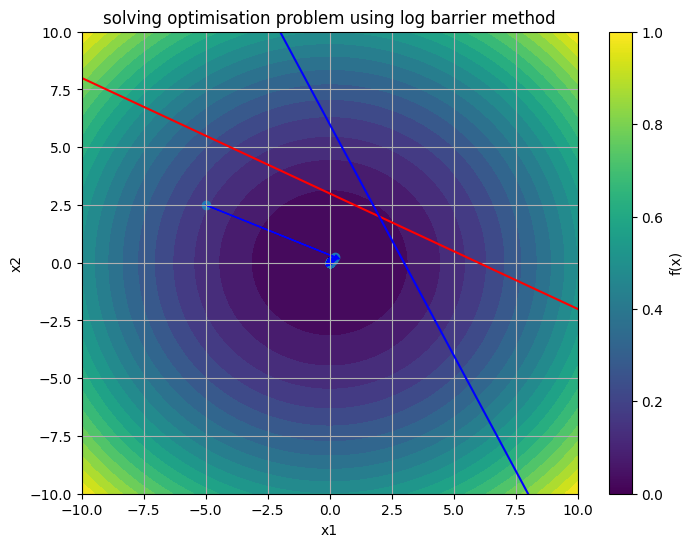

In [14]:
# Generate x and y values
x1 = np.linspace(-10, 10, 100)
x2 = np.linspace(-10, 10, 100)
X1, X2 = np.meshgrid(x1, x2)
Z = fun(X1, X2)

# Define the lines
def line1(x1):
    return (6 - x1) / 2

def line2(x1):
    return 6 - 2*x1
# Calculate corresponding y values for each line
# Generate x values
y1 = line1(x1)
y2 = line2(x1)


# Plot the function
plt.figure(figsize=(8, 6))
plt.contourf(X1, X2, Z, levels=20, cmap='viridis')
plt.plot(x1, y1, label='x1 + 2x2 = 6', color='red')
plt.plot(x1, y2, label='2x1 + x2 = 6', color='blue')
plt.scatter(position_trajectory,vel_trajectory)
for i in range(1, len(position_trajectory)):
    dx = position_trajectory[i] - position_trajectory[i-1]
    dy = vel_trajectory[i] - vel_trajectory[i-1]
    plt.arrow(position_trajectory[i-1], vel_trajectory[i-1], dx, dy, head_width=0.2, head_length=0.2, fc='blue', ec='blue')
    
plt.colorbar(label='f(x)')
plt.xlim(-10,10)
plt.ylim(-10,10)

plt.xlabel('x1')
plt.ylabel('x2')
plt.title('solving optimisation problem using log barrier method')
plt.savefig('solving optimisation problem using log barrier method')
plt.grid(True)
plt.show()